<div style="float:left">
            <h1 style="width:450px">CASA0007 Practical 8: Modelling the real world - Dice demo</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

Welcome to Practical 8. There are three notebooks in this practical. 

This notebook is a demonstration of rolling a dice. It will help you understand how the mean winnings change with the number of rolling the dice.

In this game, if the dice returns between 1 and 5, then you get the score. If the dice returns 6, then you get -6.

In [3]:
# Import packages
import matplotlib.pyplot as plt
import random as rn
import time as tm

# (The time module will be used to control the speed of the program
# using the function tm.time() to keep track of how much time has passed
# and tm.sleep(number_of_seconds) to pause execution for a set duration.)

The expected score of this dice is 1.5. Why?

1/6*(1+2+3+4+5-6) = 1.5

In [ ]:
# The simulation results will be compared with the expected score at the end
expected_score = 1.5

The parameters of this experiment is as follows. You can test with different settings.

Originally, this code was designed as an interactive plot. However, when we run in the docker and Python notebook, it is not interactive. The code returns a static plot.

So, we can ignore the parameter of `is_animation` in the code.

Note that each time you run the code, the consequent plot is different due to the randomness of dice rolling.

<Figure size 864x432 with 0 Axes>

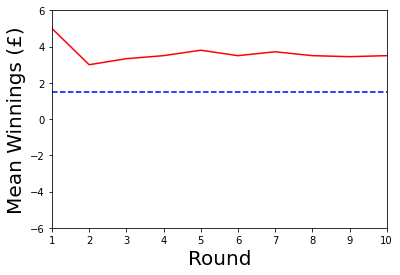

In [5]:
# Set the number of repetitions of the game
number_of_plays = 10

# Turn animation on/off
is_animation = False

# These capitalised variables will all serve to control the duration of the animation.
TOTAL_SIM_TIME = 10
INITIAL_WAIT   = 1
COMMON_RATIO   = 1 - INITIAL_WAIT/TOTAL_SIM_TIME
UPDATE_INT     = 1
FINAL_WAIT     = 0
MIN_INT        = 0.01
START_TIME     = tm.time()
CURRENT_TIME   = START_TIME

# Interactive plotting:
plt.ion()

# Create the figure on which to plot
fig1 = plt.figure(num=1,figsize=(12,6))

# Show the figure (empty at the moment)
# The .canvas.draw() and .canvas.flush_events() allow for live updating
fig1.clear()
plt.show()
plt.xlim((1,number_of_plays))
plt.ylim((-6,6))
plt.ylabel('Mean Winnings (£)', fontsize=20)
plt.xlabel('Round',fontsize=20)
fig1.canvas.draw()
fig1.canvas.flush_events()


# Here is a function that takes a dice roll and returns your score:
def game_result(dice_roll):
    
    if dice_roll < 6:
        return dice_roll
    else:
        return -6

# Create some variables (and a list) to update later:
rolling_sum = 0.0
rolling_av  = 0.0
rolling_averages = [0]
plot_start = 0

# Play the game many times
for i in range(number_of_plays):
    
    # Roll the dice:
    new_roll = rn.randint(1,6)
    
    # Update the variables
    rolling_sum += game_result(new_roll)
    rolling_av = rolling_sum/(i+1)
    rolling_averages += [rolling_av]
    
    # We need to check the time here to control how fast the graph is being plotted:
    NEW_TIME = tm.time()
    
    # This bit of code displays the updated plot.
    # However, there are some conditions to make sure it doesn't try to update too frequently to prevent the plotting from slowing down.
    if is_animation == True and (i == 0 or NEW_TIME-CURRENT_TIME > MIN_INT):
        
        plt.plot(range(plot_start,i+2),rolling_averages[plot_start-i-2:],'r-')
        fig1.canvas.draw()
        fig1.canvas.flush_events()
        plot_start = i+1
        
        CURRENT_TIME= tm.time()
        
    # How long to wait between iterations...
    # This is set up to accelerate as more of the graph is drawn:
    if is_animation == True:
        WAIT_TIME = INITIAL_WAIT*COMMON_RATIO**i
        tm.sleep(WAIT_TIME)

# A final update, to make sure the complete plot has been displayed:
fig1.clear()
plt.xlim((1,number_of_plays))
plt.ylim((-6,6))
plt.plot(range(number_of_plays+1),rolling_averages,'r-')
fig1.canvas.draw()

# Wait a little:
tm.sleep(FINAL_WAIT)

# Then plot the predicted expected score as a dotted line:
plt.plot([1,number_of_plays],[expected_score]*2,'b--')
fig1.canvas.draw()

## Conclusions

We have demonstrated the dice rolling in a simulation environment. 

Now you can play with the code after changing the settings or the game rules.

## Credits
### Contributors:
The following individuals have contributed to these teaching materials: Thomas Evans, Hannah Fry, [Huanfa Chen](huanfa.chen@ucl.ac.uk)

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
NA

### Dependencies
This notebook depends on the following libraries: matplotlib, random, time